In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
dn = pd.read_csv("C:/Users/vmari/OneDrive/Desktop/Lambton/2nd_term/AI/Project_Accidents_severity/US_Accidents_March23.csv")

In [3]:
dn.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
dn.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
null_counts=dn.isnull().sum()
total_rows=len(dn)
null_count_percetnage=(null_counts/total_rows)*100
print(null_count_percetnage)

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [6]:
print(dn.describe())


           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

In [7]:
dn.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

##Scatter plots for finding correlation between Severity and features

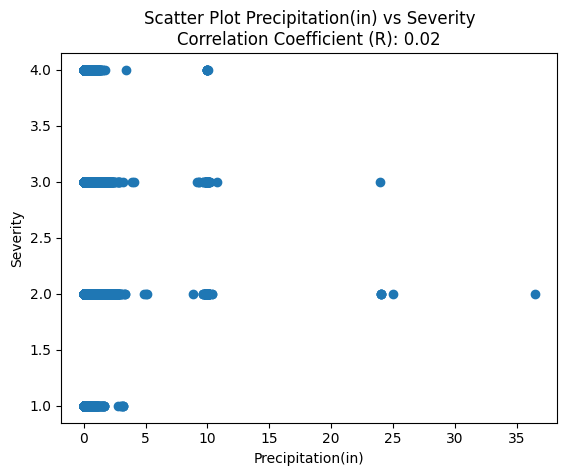

In [8]:

#Precipitation in this dataset refers to precipitation acumulation amount
#Scatter plot
correlation_coefficient_p = dn['Precipitation(in)'].corr(dn['Severity'])
plt.scatter(dn['Precipitation(in)'], dn['Severity'])
plt.xlabel('Precipitation(in)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Precipitation(in) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_p:.2f}')

plt.show()

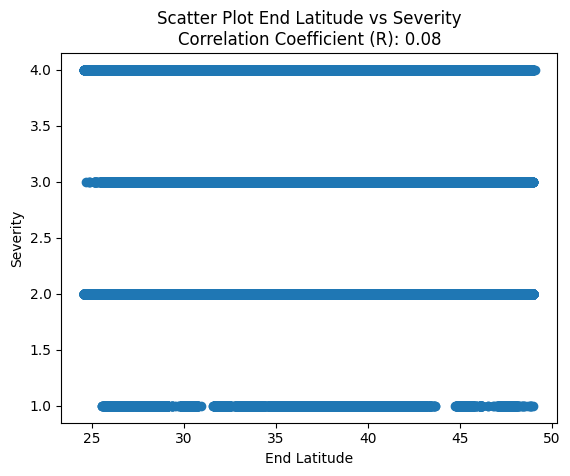

In [9]:
#End Latitude Scatter plot
correlation_coefficient_endLat = dn['End_Lat'].corr(dn['Severity'])
plt.scatter(dn['End_Lat'], dn['Severity'])
plt.xlabel('End Latitude')
plt.ylabel('Severity')
plt.title(f'Scatter Plot End Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

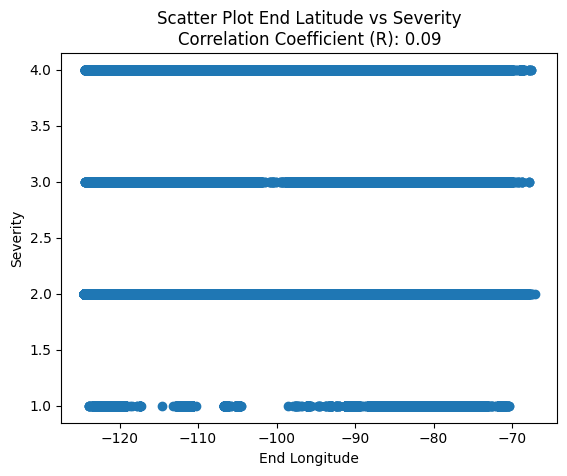

In [10]:
#End Longitude Scatter plot
correlation_coefficient_endLong = dn['End_Lng'].corr(dn['Severity'])
plt.scatter(dn['End_Lng'], dn['Severity'])
plt.xlabel('End Longitude')
plt.ylabel('Severity')
plt.title(f'Scatter Plot End Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLong:.2f}')

plt.show()

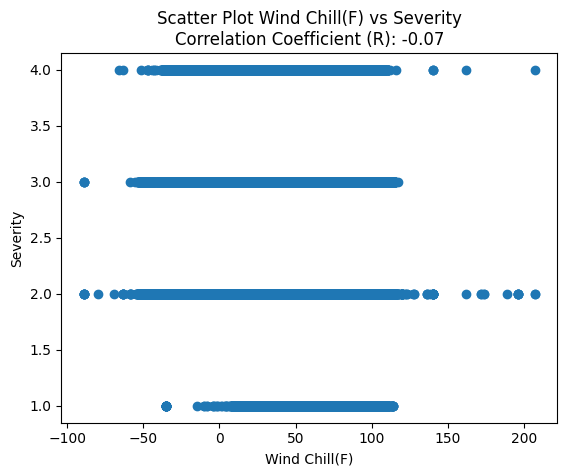

In [11]:
#Wind Chill Scatter plot
correlation_coefficient_WC = dn['Wind_Chill(F)'].corr(dn['Severity'])
plt.scatter(dn['Wind_Chill(F)'], dn['Severity'])
plt.xlabel('Wind Chill(F)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Wind Chill(F) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_WC:.2f}')

plt.show()

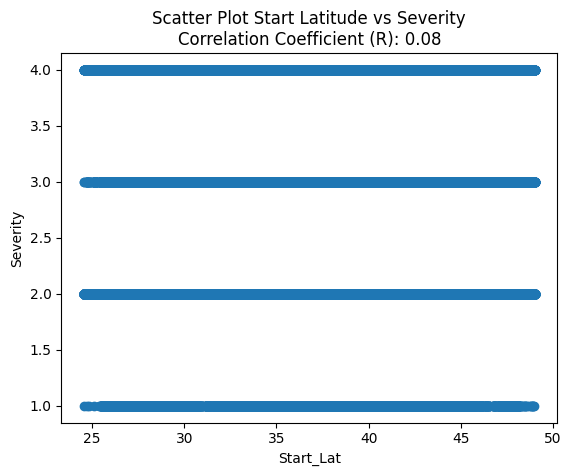

In [12]:
##Start_Lat Scatter plot
correlation_coefficient_endLong = dn['Start_Lat'].corr(dn['Severity'])
plt.scatter(dn['Start_Lat'], dn['Severity'])
plt.xlabel('Start_Lat')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Start Latitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

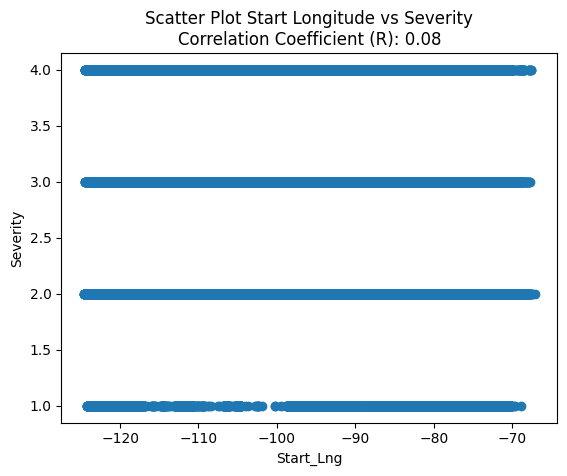

In [13]:
##Start_Lng Scatter plot
correlation_coefficient_endLong = dn['Start_Lng'].corr(dn['Severity'])
plt.scatter(dn['Start_Lng'], dn['Severity'])
plt.xlabel('Start_Lng')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Start Longitude vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

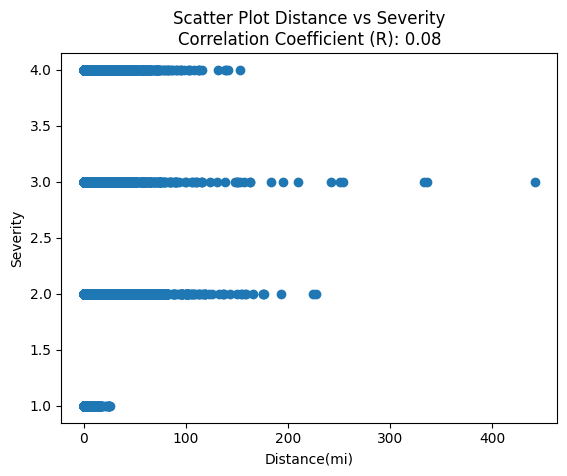

In [14]:
##Distance(mi) Scatter plot
correlation_coefficient_endLong = dn['Distance(mi)'].corr(dn['Severity'])
plt.scatter(dn['Distance(mi)'], dn['Severity'])
plt.xlabel('Distance(mi)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Distance vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_endLat:.2f}')

plt.show()

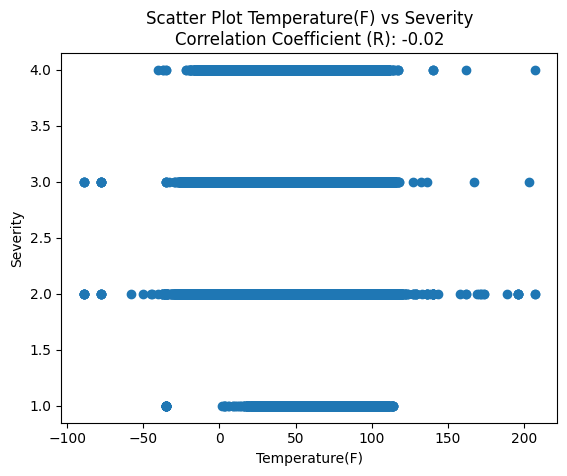

In [15]:
##4 Temperature(F) Scatter plot

correlation_coefficient_T = dn['Temperature(F)'].corr(dn['Severity'])
plt.scatter(dn['Temperature(F)'], dn['Severity'])
plt.xlabel('Temperature(F)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Temperature(F) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_T:.2f}')

plt.show()


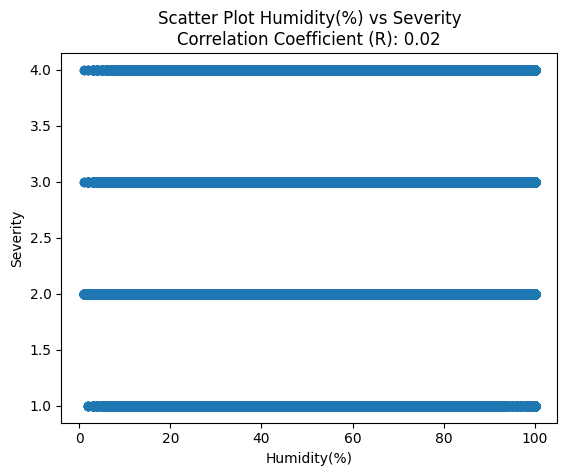

In [16]:
##5 Humidity(%) Scatter plot

correlation_coefficient_h = dn['Humidity(%)'].corr(dn['Severity'])
plt.scatter(dn['Humidity(%)'], dn['Severity'])
plt.xlabel('Humidity(%)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Humidity(%) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_h:.2f}')

plt.show()




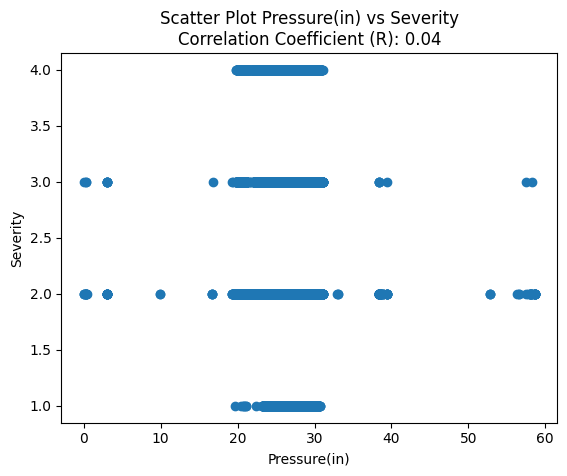

In [17]:
##6 Pressure(in) Scatter plot

correlation_coefficient_p = dn['Pressure(in)'].corr(dn['Severity'])
plt.scatter(dn['Pressure(in)'], dn['Severity'])
plt.xlabel('Pressure(in)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Pressure(in) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_p:.2f}')

plt.show()




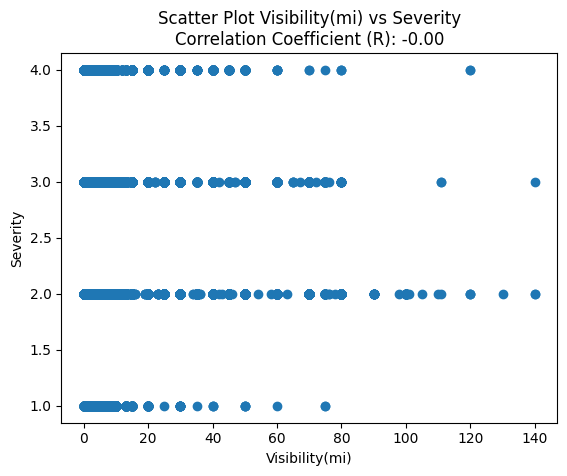

In [18]:
##7 Visibility Scatter plot

correlation_coefficient_v = dn['Visibility(mi)'].corr(dn['Severity'])
plt.scatter(dn['Visibility(mi)'], dn['Severity'])
plt.xlabel('Visibility(mi)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Visibility(mi) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_v:.2f}')

plt.show()

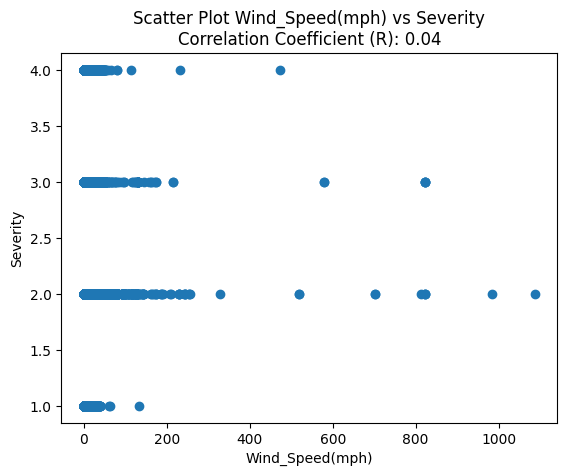

In [19]:
##9 Wind Speed
correlation_coefficient_ws = dn['Wind_Speed(mph)'].corr(dn['Severity'])
plt.scatter(dn['Wind_Speed(mph)'], dn['Severity'])
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Severity')
plt.title(f'Scatter Plot Wind_Speed(mph) vs Severity\nCorrelation Coefficient (R): {correlation_coefficient_ws:.2f}')

plt.show()


In [20]:
#Dividing Timestamp columns 
dn['Weather_Timestamp'] = pd.to_datetime(dn['Weather_Timestamp'])

# Extract date and hour components
dn['Date'] = dn['Weather_Timestamp'].dt.date
dn['Hour'] = dn['Weather_Timestamp'].dt.hour




## Distribution Graphs

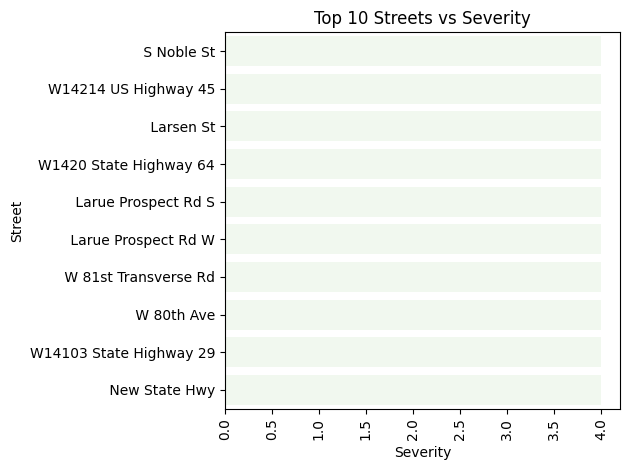

In [21]:
street_severity = dn.groupby('Street')['Severity'].mean().reset_index()

# Get the top 10 streets by mean severity
top_streets = street_severity.sort_values(by='Severity', ascending=False).head(10)

filtered_streets = dn[dn['Street'].isin(top_streets['Street'])]

green_palette = sns.color_palette("Greens", 20)
sns.set_palette(green_palette)
sns.barplot(x='Severity', y='Street', data=filtered_streets, order=top_streets['Street'])
plt.title('Top 10 Streets vs Severity')
plt.xlabel('Severity')
plt.ylabel('Street')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()



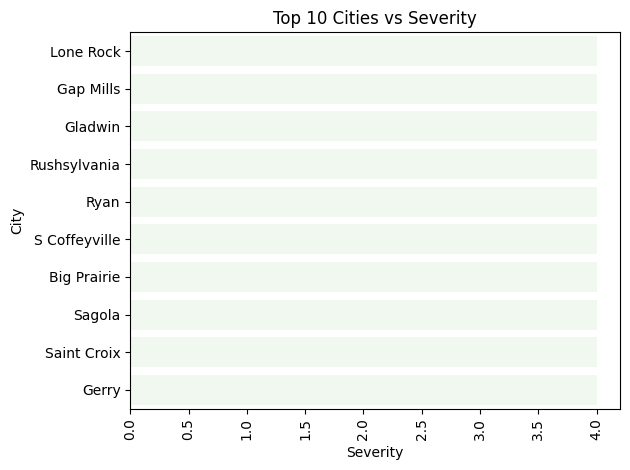

In [22]:
city_severity = dn.groupby('City')['Severity'].mean().reset_index()

# Get the top 10 cities by mean severity
top_cities = city_severity.sort_values(by='Severity', ascending=False).head(10)

filtered_cities = dn[dn['City'].isin(top_cities['City'])]

green_palette = sns.color_palette("Greens", 20)
sns.set_palette(green_palette)
sns.barplot(x='Severity', y='City', data=filtered_cities, order=top_cities['City'])
plt.title('Top 10 Cities vs Severity')
plt.xlabel('Severity')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

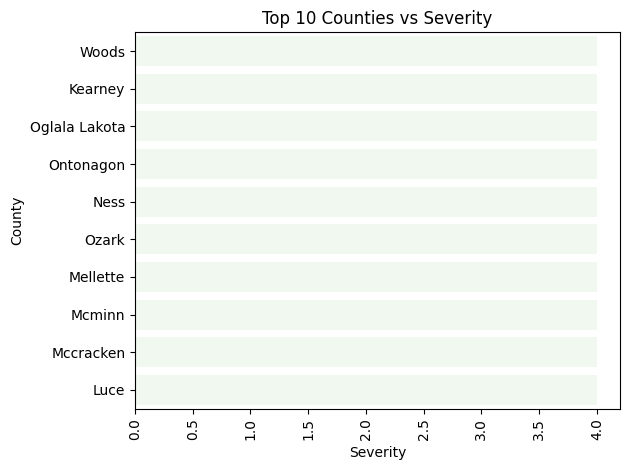

In [23]:
county_severity = dn.groupby('County')['Severity'].mean().reset_index()

# Get the top 10 counties by mean severity
top_counties = county_severity.sort_values(by='Severity', ascending=False).head(10)

filtered_counties = dn[dn['County'].isin(top_counties['County'])]

green_palette = sns.color_palette("Greens", 20)
sns.set_palette(green_palette)
sns.barplot(x='Severity', y='County', data=filtered_counties, order=top_counties['County'])
plt.title('Top 10 Counties vs Severity')
plt.xlabel('Severity')
plt.ylabel('County')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\646072888.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\646072888.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


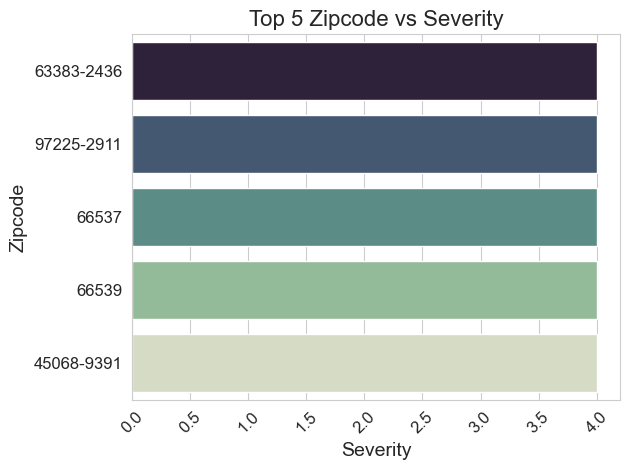

In [14]:
Zipcode_severity= dn.groupby('Zipcode')['Severity'].mean().reset_index()
zipcode = Zipcode_severity.sort_values(by='Severity', ascending=False).head(5)

filtered_data_zip = dn[dn['Zipcode'].isin(zipcode['Zipcode'])]

sns.set_style("whitegrid")

dynamic_palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)

sns.barplot(
    x='Severity',
    y='Zipcode',
    data=filtered_data_zip,
    palette=dynamic_palette,
    order=zipcode['Zipcode'],
    ci=None
)

plt.title('Top 5 Zipcode vs Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Zipcode', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\3073207988.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\3073207988.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


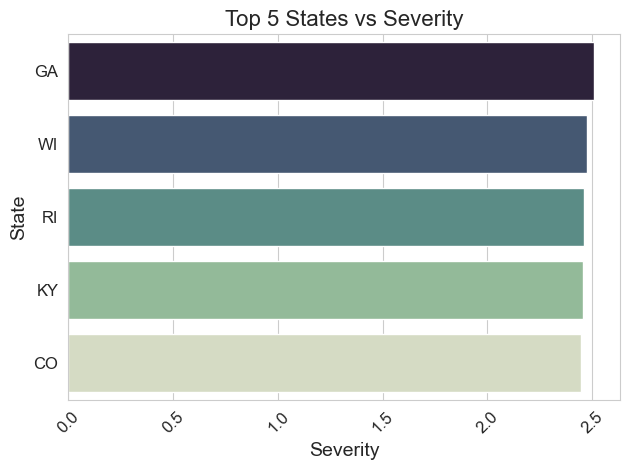

In [16]:

state_severity= dn.groupby('State')['Severity'].mean().reset_index()
State = state_severity.sort_values(by='Severity', ascending=False).head(5)

filtered_data_state = dn[dn['State'].isin(State['State'])]

sns.set_style("whitegrid")

dynamic_palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)

sns.barplot(
    x='Severity',
    y='State',
    data=State,
    palette=dynamic_palette,
    order=State['State'],
    ci=None
)

plt.title('Top 5 States vs Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\3303103686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\3303103686.py:6: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(


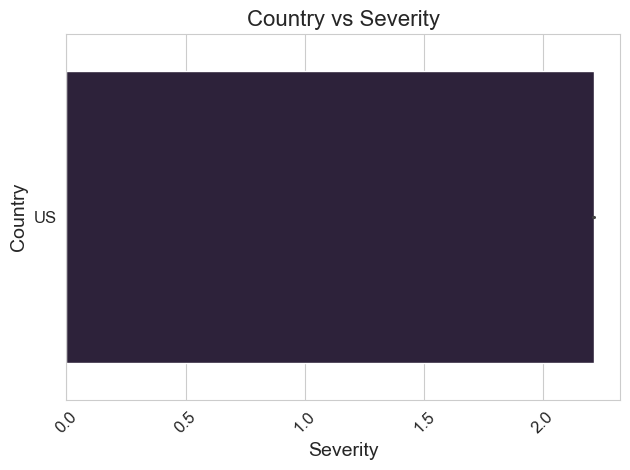

In [17]:
#Country
sns.set_style("whitegrid")

dynamic_palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)

sns.barplot(
    x='Severity',
    y='Country',
    data=dn,
    palette=dynamic_palette,
    
)

plt.title('Country vs Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2598278820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wind_Direction', y='Severity', data=dn, palette=blue_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


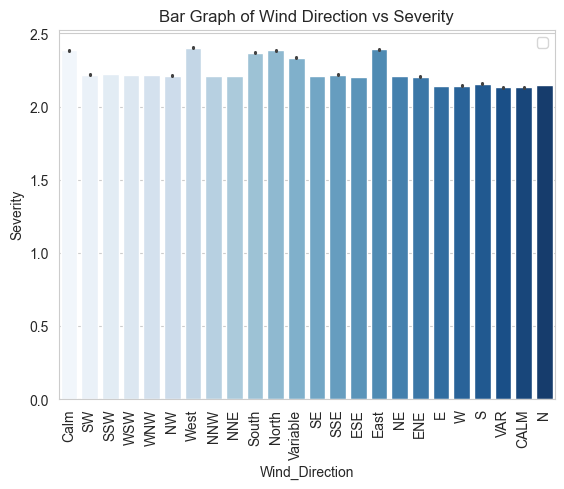

In [18]:
# Wind direction
blue_palette = sns.color_palette("Blues", 24)
sns.set_palette(blue_palette)
sns.barplot(x='Wind_Direction', y='Severity', data=dn, palette=blue_palette)


plt.title('Bar Graph of Wind Direction vs Severity')
plt.xlabel('Wind_Direction')
plt.ylabel('Severity')

plt.xticks(rotation=90) 
plt.legend()

plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2984948961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


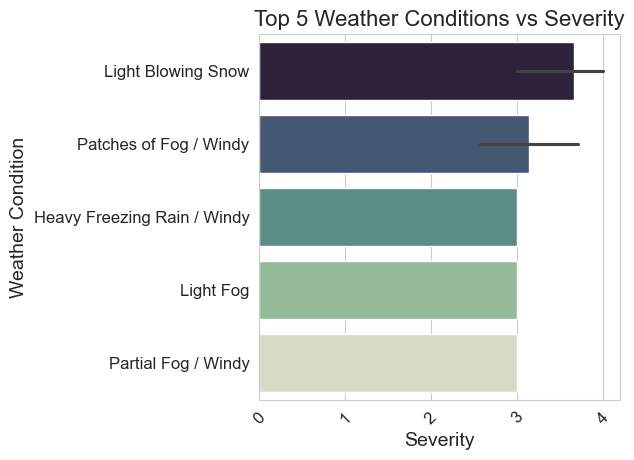

In [19]:
weather_severity= dn.groupby('Weather_Condition')['Severity'].mean().reset_index()
top_weather_conditions = weather_severity.sort_values(by='Severity', ascending=False).head(5)

filtered_data = dn[dn['Weather_Condition'].isin(top_weather_conditions['Weather_Condition'])]

sns.set_style("whitegrid")

dynamic_palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)

sns.barplot(
    x='Severity',
    y='Weather_Condition',
    data=filtered_data,
    palette=dynamic_palette,
    order=top_weather_conditions['Weather_Condition']
)

plt.title('Top 5 Weather Conditions vs Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ci=None


plt.tight_layout()
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\4093254684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amenity', y='Severity', data=dn,palette=palette )


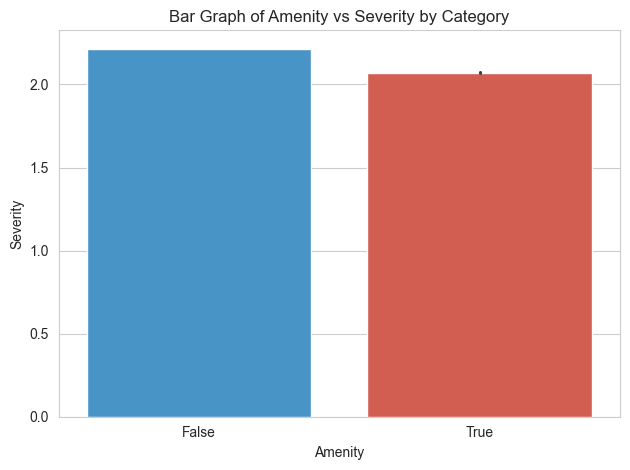

In [20]:
#Amenity
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Amenity', y='Severity', data=dn,palette=palette )

plt.title('Bar Graph of Amenity vs Severity by Category')
plt.xlabel('Amenity')
plt.ylabel('Severity')
plt.tight_layout()
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1162383707.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bump', y='Severity', data=dn, palette=palette, ci=None)
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1162383707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bump', y='Severity', data=dn, palette=palette, ci=None)


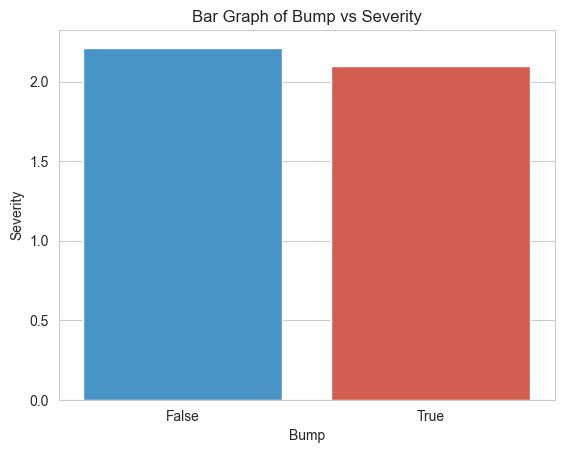

In [21]:
#Bump 
palette = ["#3498db", "#e74c3c"] 
sns.barplot(x='Bump', y='Severity', data=dn, palette=palette, ci=None)

sns.set_style()

plt.title('Bar Graph of Bump vs Severity')
plt.xlabel('Bump')
plt.ylabel('Severity')

plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\897184733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crossing', y='Severity', data=dn, palette=palette)


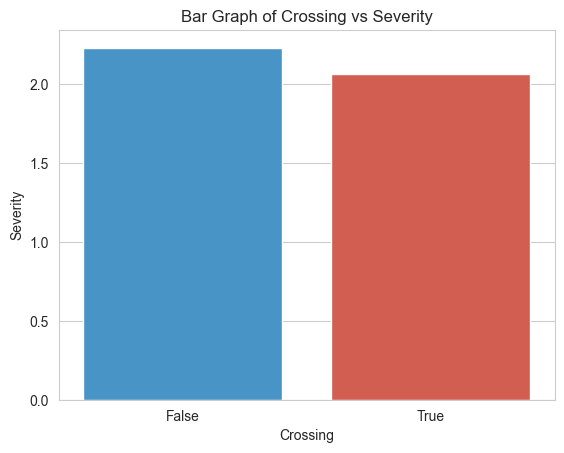

In [22]:
#Crossing 
palette = ["#3498db", "#e74c3c"] 
sns.barplot(x='Crossing', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Crossing vs Severity')
plt.xlabel('Crossing')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2380648395.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Give_Way', y='Severity', data=dn, palette=palette, ci=None)
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2380648395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Give_Way', y='Severity', data=dn, palette=palette, ci=None)


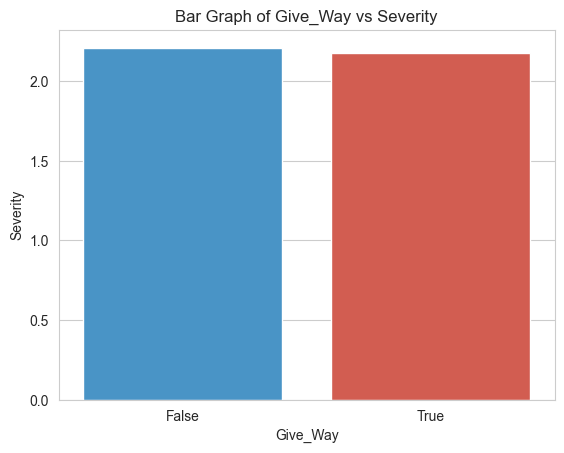

In [23]:

#Give_Way
palette = ["#3498db", "#e74c3c"] 
sns.barplot(x='Give_Way', y='Severity', data=dn, palette=palette, ci=None)

sns.set_style()

plt.title('Bar Graph of Give_Way vs Severity')
plt.xlabel('Give_Way')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2859289516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Junction', y='Severity', data=dn, palette=palette)


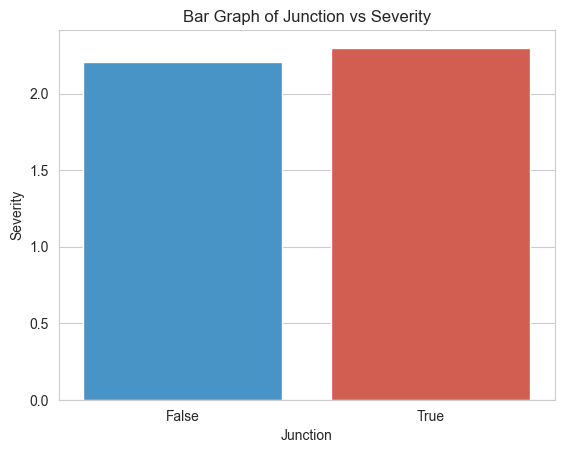

In [24]:
#Junction
palette = ["#3498db", "#e74c3c"] 
sns.barplot(x='Junction', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Junction vs Severity')
plt.xlabel('Junction')
plt.ylabel('Severity')
plt.show()


C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2882409962.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='No_Exit', y='Severity', data=dn, palette=palette, ci=None)
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2882409962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No_Exit', y='Severity', data=dn, palette=palette, ci=None)


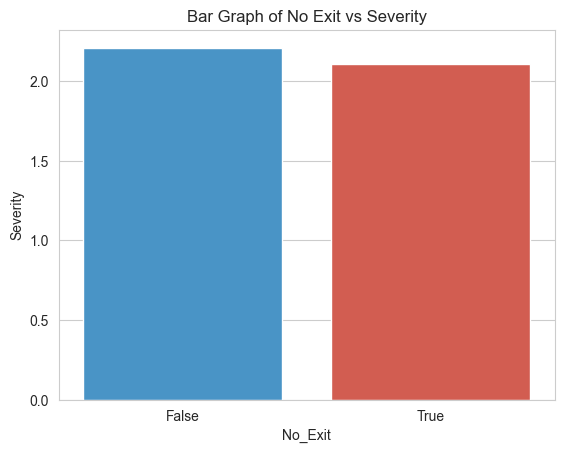

In [25]:
#No_Exit
palette = ["#3498db", "#e74c3c"] 
sns.barplot(x='No_Exit', y='Severity', data=dn, palette=palette, ci=None)

sns.set_style()

plt.title('Bar Graph of No Exit vs Severity')
plt.xlabel('No_Exit')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\3499434827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Railway', y='Severity', data=dn, palette=palette)


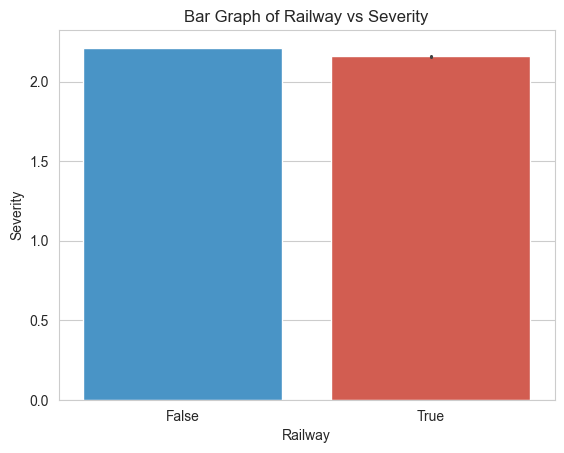

In [26]:
#Railway
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Railway', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Railway vs Severity')
plt.xlabel('Railway')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1416926154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Roundabout', y='Severity', data=dn, palette=palette)


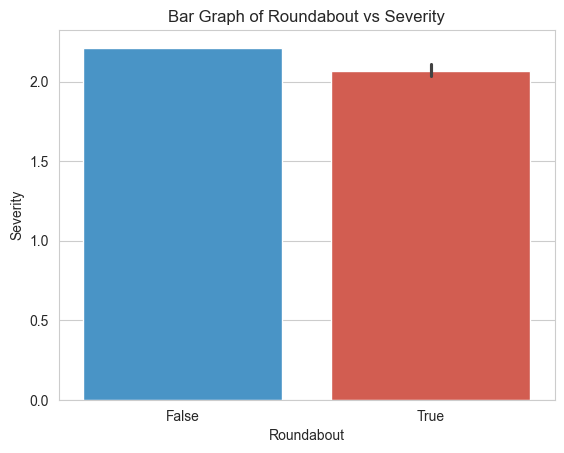

In [27]:
#Roundabout
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Roundabout', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Roundabout vs Severity')
plt.xlabel('Roundabout')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\2609278297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Station', y='Severity', data=dn, palette=palette)


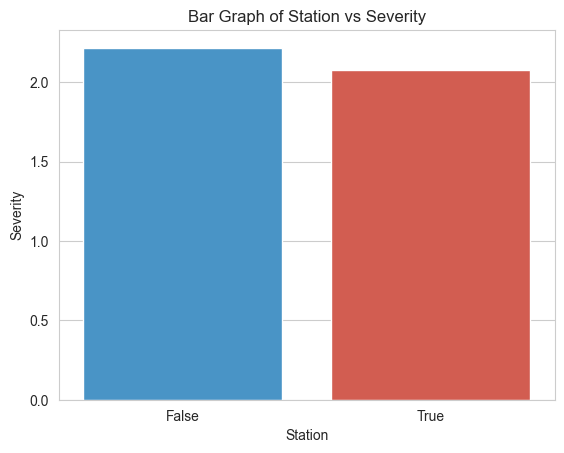

In [28]:
#Station
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Station', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Station vs Severity')
plt.xlabel('Station')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1934949875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stop', y='Severity', data=dn, palette=palette)


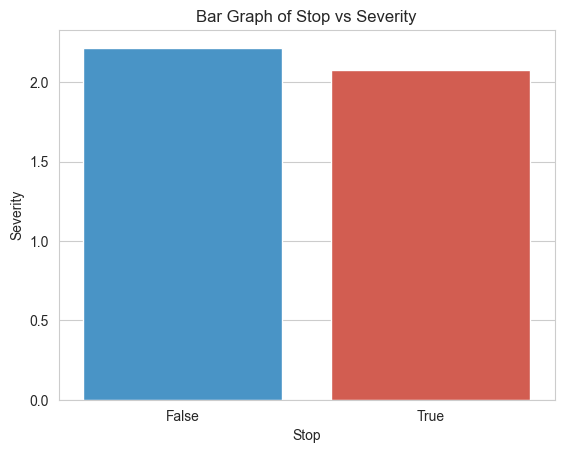

In [29]:
#Stop
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Stop', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Stop vs Severity')
plt.xlabel('Stop')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\952513934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic_Calming', y='Severity', data=dn, palette=palette)


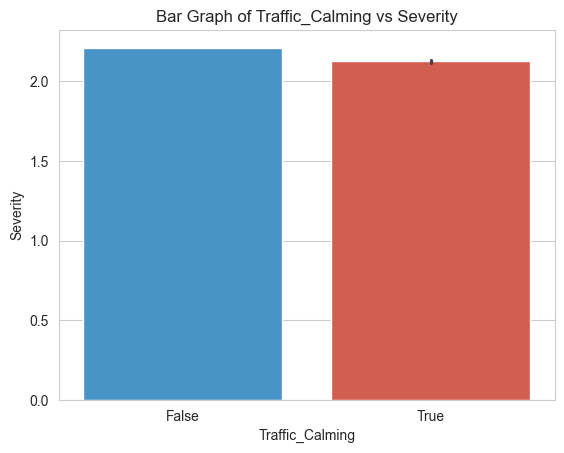

In [30]:
#Traffic_Calming
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Traffic_Calming', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Traffic_Calming vs Severity')
plt.xlabel('Traffic_Calming')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1615711307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic_Signal', y='Severity', data=dn, palette=palette)


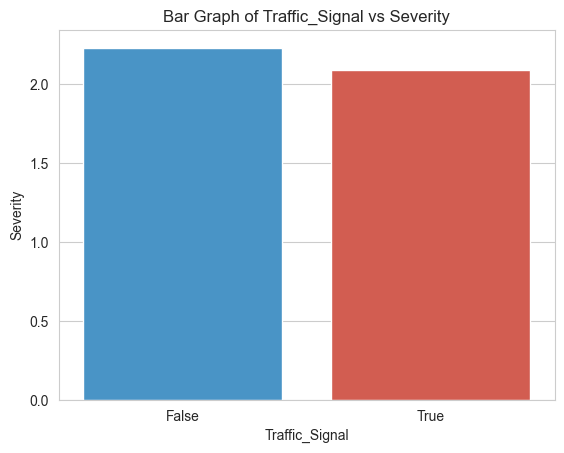

In [31]:
#Traffic_Signal
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Traffic_Signal', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Traffic_Signal vs Severity')
plt.xlabel('Traffic_Signal')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1965500210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Turning_Loop', y='Severity', data=dn, palette=palette)
C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1965500210.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Turning_Loop', y='Severity', data=dn, palette=palette)


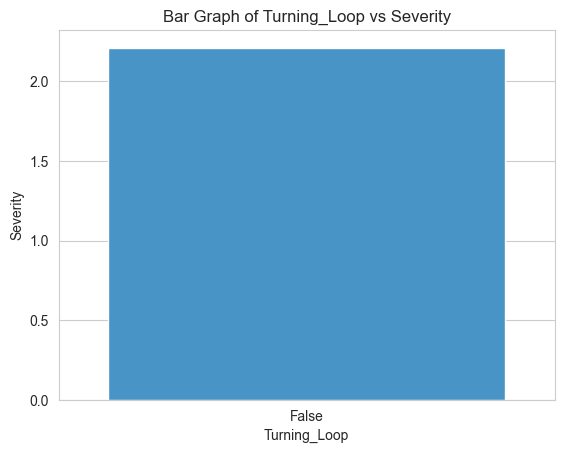

In [32]:
#Turning_Loop
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Turning_Loop', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Turning_Loop vs Severity')
plt.xlabel('Turning_Loop')
plt.ylabel('Severity')
plt.show()

C:\Users\vmari\AppData\Local\Temp\ipykernel_15644\1432879586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sunrise_Sunset', y='Severity', data=dn, palette=palette)


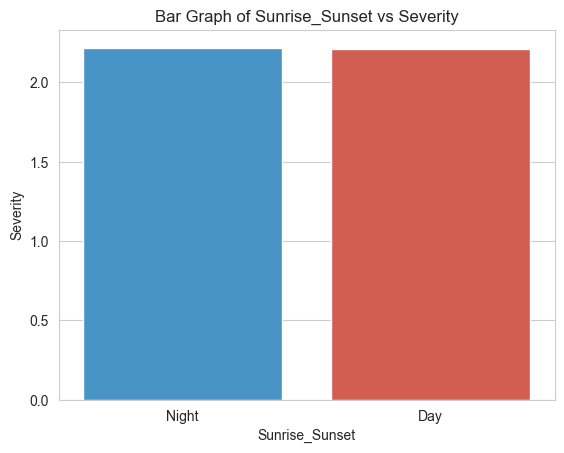

In [33]:
#Bar Graph of Sunrise Sunset
palette = ["#3498db", "#e74c3c"]
sns.barplot(x='Sunrise_Sunset', y='Severity', data=dn, palette=palette)

sns.set_style()

plt.title('Bar Graph of Sunrise_Sunset vs Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()